In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfTransformer

# Step 1: Define the folder path (Modify this if needed)
folder_path = "data/teacher_discourse_data"

# Step 2: Check if the folder exists
if not os.path.exists(folder_path):
    print(f"Error: Directory '{folder_path}' does not exist. Please check the path.")
else:
    print(f"Directory '{folder_path}' found.\nListing available files...\n")

    # Step 3: List available files in the directory
    available_files = os.listdir(folder_path)
    print("Files in directory:", available_files)

    # Step 4: Categorize files into three lists
    corpus_files = glob.glob(os.path.join(folder_path, "*corpus_segm_unlemm_full.csv"))
    dfm_lemm_files = glob.glob(os.path.join(folder_path, "*dfm_segm_lemm_full.csv"))
    dfm_unlemm_files = glob.glob(os.path.join(folder_path, "*dfm_segm_unlemm_full.csv"))

    # Step 5: Load the files into Pandas DataFrames
    def load_files(file_list, description):
        """Loads CSV files from a list into a single DataFrame."""
        if file_list:
            print(f"Loading {description} ({len(file_list)} files)...")
            return pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)
        else:
            print(f"No files found for {description}.")
            return pd.DataFrame()  # Return empty DataFrame if no files

    df_corpus = load_files(corpus_files, "Corpus Data")
    df_dfm_lemm = load_files(dfm_lemm_files, "DFM Lemm Data")
    df_dfm_unlemm = load_files(dfm_unlemm_files, "DFM Unlemm Data")

    # Step 6: Display basic information about each dataset
    for name, df in zip(["Corpus Data", "DFM Lemm Data", "DFM Unlemm Data"],
                        [df_corpus, df_dfm_lemm, df_dfm_unlemm]):
        print(f"\n{name} Overview:")
        print(df.info())
        print(df.head())

    # # Step 7: Save DataFrames for further analysis if needed
    # df_corpus.to_csv("corpus_data_combined.csv", index=False)
    # df_dfm_lemm.to_csv("dfm_lemm_data_combined.csv", index=False)
    # df_dfm_unlemm.to_csv("dfm_unlemm_data_combined.csv", index=False)

    print("\nData loading complete. CSVs saved for reference.")


Directory 'data/teacher_discourse_data' found.
Listing available files...

Files in directory: ['cl06_pr2_dfm_segm_lemm_full.csv', 'cl08_pr1_corpus_segm_unlemm_full.csv', 'cl01_pr1_dfm_segm_lemm_full.csv', 'cl01_pr2_corpus_segm_unlemm_full.csv', 'cl07_pr2_dfm_segm_unlemm_full.csv', 'cl04_pr2_corpus_segm_unlemm_full.csv', 'cl09_pr2_dfm_segm_unlemm_full.csv', 'cl03_pr1_dfm_segm_unlemm_full.csv', 'cl09_pr2_corpus_segm_unlemm_full.csv', 'cl04_pr2_dfm_segm_unlemm_full.csv', 'cl06_pr1_dfm_segm_lemm_full.csv', 'cl05_pr1_corpus_segm_unlemm_full.csv', 'cl01_pr2_dfm_segm_lemm_full.csv', 'cl03_pr1_corpus_segm_unlemm_full.csv', 'cl02_pr2_dfm_segm_unlemm_full.csv', 'cl08_pr1_dfm_segm_unlemm_full.csv', 'cl06_pr1_dfm_segm_unlemm_full.csv', 'cl06_pr1_corpus_segm_unlemm_full.csv', 'cl07_pr1_dfm_segm_lemm_full.csv', 'cl07_pr2_dfm_segm_lemm_full.csv', 'cl02_pr2_corpus_segm_unlemm_full.csv', 'cl05_pr1_dfm_segm_unlemm_full.csv', 'cl01_pr2_dfm_segm_unlemm_full.csv', 'cl07_pr2_corpus_segm_unlemm_full.csv', '

/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_59836/2562339189.py:33: DtypeWarning: Columns (1297) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)
/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_59836/2562339189.py:33: DtypeWarning: Columns (1292) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)
/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_59836/2562339189.py:33: DtypeWarning: Columns (1039) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)
/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_59836/2562339189.py:33: DtypeWarning: Columns (1039) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat([pd.read_csv


Corpus Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    8751 non-null   int64  
 1   doc_id                        8751 non-null   object 
 2   text                          8751 non-null   object 
 3   timestamp                     8751 non-null   object 
 4   statement_duration            8751 non-null   float64
 5   teacher_id                    8751 non-null   object 
 6   recipient                     8748 non-null   object 
 7   comment_didactic              340 non-null    object 
 8   comment_bugs                  17 non-null     object 
 9   time_slice                    8751 non-null   object 
 10  segment_source                8751 non-null   object 
 11  class_id                      8751 non-null   object 
 12  pupils_number                 8751 non-

In [2]:
# Step 1: Create a dictionary mapping segment_source to concatenated text
concatenated_data = {}

for index, row in df_corpus.iterrows():
    segment_source = row["segment_source"]
    text = row["text"]
    
    if segment_source in concatenated_data:
        concatenated_data[segment_source] += " " + text
    else:
        concatenated_data[segment_source] = text

# Step 2: Create a new DataFrame with one row per segment_source
import pandas as pd

# Get one row per segment_source (to preserve other columns)
df_deduplicated = df_corpus.drop_duplicates(subset=["segment_source"])

# Update the text column with our concatenated text
for index, row in df_deduplicated.iterrows():
    segment_source = row["segment_source"]
    df_deduplicated.at[index, "text"] = concatenated_data[segment_source]

# Step 3: Test that the transformation worked correctly
def test_concatenation():
    # Count unique segment sources in original dataframe
    original_unique_sources = df_corpus["segment_source"].nunique()
    
    # Count rows in new dataframe
    new_row_count = len(df_deduplicated)
    
    # Test 1: Verify we have exactly one row per segment_source
    assert original_unique_sources == new_row_count, "Number of rows doesn't match number of unique segment sources"
    
    # Test 2: Verify all segments are preserved in the concatenated text
    for segment_source in df_deduplicated["segment_source"].unique():
        # Get all original texts for this segment source
        original_texts = df_corpus[df_corpus["segment_source"] == segment_source]["text"].tolist()
        
        # Get the concatenated text
        concatenated_text = df_deduplicated[df_deduplicated["segment_source"] == segment_source]["text"].iloc[0]
        
        # Check that each original text is contained in the concatenated text
        for text in original_texts:
            assert text in concatenated_text, f"Missing text in concatenation for {segment_source}"
    
    print("All tests passed! Concatenation successful.")

# Run the test
test_concatenation()

All tests passed! Concatenation successful.


/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_59836/3042118491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduplicated["text_length"] = df_deduplicated["text"].apply(lambda x: len(str(x).split()))


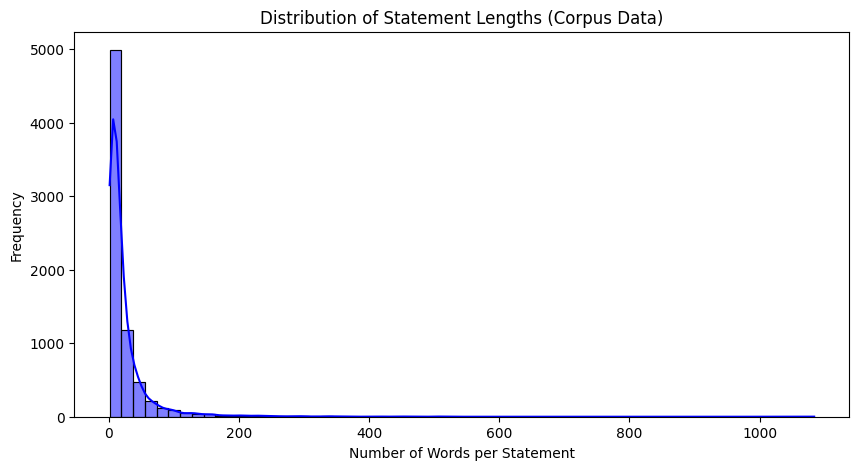

/var/folders/0k/43ckgrhd7cd68vbpqrmw9r240000gn/T/ipykernel_59836/3042118491.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.values, y=topic_counts.index, palette="viridis")


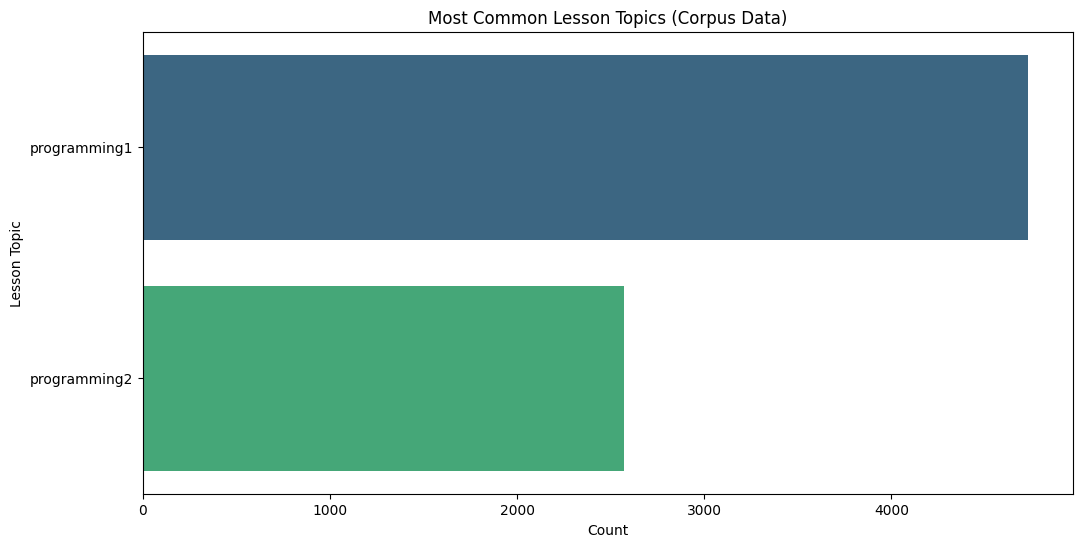

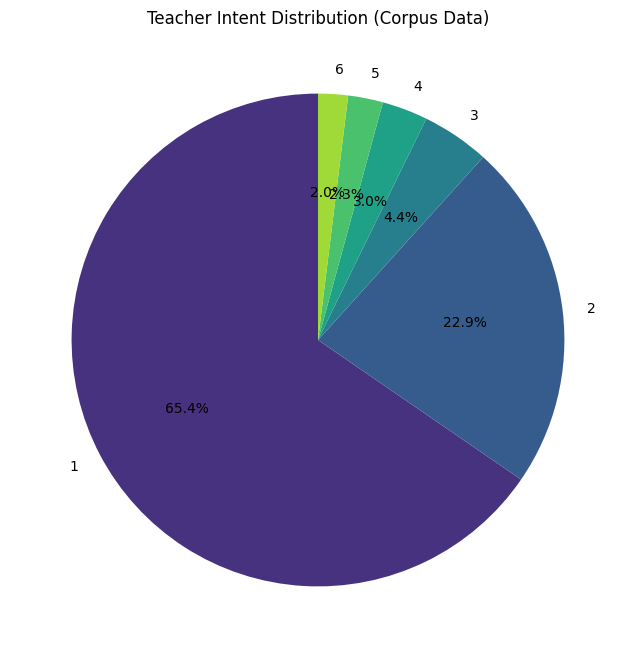

In [3]:
if not df_deduplicated.empty:
    # (a) Text Length Distribution
    df_deduplicated["text_length"] = df_deduplicated["text"].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10, 5))
    sns.histplot(df_deduplicated["text_length"], bins=60, kde=True, color="blue")
    plt.xlabel("Number of Words per Statement")
    plt.ylabel("Frequency")
    plt.title("Distribution of Statement Lengths (Corpus Data)")
    plt.show()

    # (b) Most Common Topics (lesson_topic)
    plt.figure(figsize=(12, 6))
    topic_counts = df_deduplicated["lesson_topic"].value_counts()
    sns.barplot(x=topic_counts.values, y=topic_counts.index, palette="viridis")
    plt.xlabel("Count")
    plt.ylabel("Lesson Topic")
    plt.title("Most Common Lesson Topics (Corpus Data)")
    plt.show()

    # (c) Teacher Intent Distribution (pie chart)
    plt.figure(figsize=(8, 8))
    intent_counts = df_deduplicated["teacher_intent"].value_counts()
    intent_counts.plot.pie(autopct="%1.1f%%", startangle=90, colors=sns.color_palette("viridis", len(intent_counts)))
    plt.ylabel("")
    plt.title("Teacher Intent Distribution (Corpus Data)")
    plt.show()
else:
    print("Corpus Data is empty; skipping corpus visualizations.")



# clean data

In [4]:
import spacy
nlp = spacy.load('fr_core_news_sm')

def lemmatize_text(text):
    """Lemmatize text using spaCy's French model"""
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

def lower_case(text):
    """Convert text to lowercase"""
    return text.lower()

def data_clean_pandas(df):
    """Clean the dataframe by filtering and preprocessing the text."""
    # Create a copy to avoid modifying the original
    df_cleaned = df.copy()

    # Apply lowercase transformation
    df_cleaned['text'] = df_cleaned['text'].apply(lower_case)

    # Apply lemmatization
    df_cleaned['text'] = df_cleaned['text'].apply(lemmatize_text)
    
    return df_cleaned

In [7]:
# Apply the function to your dataframe
df_cleaned = data_clean_pandas(df_deduplicated)

In [ ]:
df_cleaned["text"]

0       alors bonjour à tout ! alors … on être là aujo...
1       encore un ! ouai , cela , ce être le avant-der...
2       ouai ce être un bon début . quoi de autre ? oui ?
3       tu créer le début mais tu créer quoi sur le or...
4       le programme … et pouvoir il aller servir à qu...
                              ...                        
8742    voilà . vous être tout prêt ? comme cela on al...
8747                                                oui .
8748    alors , euh … je ne savoir pas si pouvoir être...
8749    je penser que sur internet , sur le moteur de ...
8750    exactement . alors voilà , si ce être bon , je...
Name: text, Length: 7304, dtype: object

In [ ]:
from sentence_transformers import SentenceTransformer

# Load the bilingual embedding model
model = SentenceTransformer('Lajavaness/bilingual-embedding-small', trust_remote_code=True)


In [6]:
from sentence_transformers import SentenceTransformer
import umap
import plotly.express as px


corpus = [row['text'].split(" ") for index, row in df_cleaned.iterrows()]


flat_list = [word for sentence in corpus for word in sentence]

tokens = [flat_list]


print(tokens[0][:1000])
print(len(tokens[0]))
# Create embeddings for the corpus




/Users/tijuana/miniconda3/envs/p311/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


ModuleNotFoundError: No module named 'umap'

In [ ]:
# 3. Encode your corpus into embeddings
embeddings = model.encode(flat_list)

In [ ]:
# Assuming 'embeddings' is a NumPy array
print(embeddings.shape)


(236543, 384)


In [ ]:
import numpy as np

np.savetxt('vectors.tsv', embeddings, delimiter='\t')


In [ ]:
print(len(flat_list))

236543


In [ ]:
# Assuming 'metadata' is a list of tuples or lists, each containing metadata attributes
with open("metadata.tsv", "r") as f:
    lines = f.readlines()
with open("metadata.tsv", "w") as f:
    for line in lines:
        if line.strip():  # Only write non-empty lines
            f.write(line)


In [ ]:
print(f"Embeddings: {embeddings.shape[0]} rows")  # Number of vectors
print(f"Metadata: {len(flat_list)} rows")  # Number of labels


Embeddings: 236543 rows
Metadata: 236543 rows


In [ ]:
with open('metadata.tsv', 'w') as f:
    for i in range(len(embeddings)):  # Ensure exact match
        label = flat_list[i] if i < len(flat_list) else "UNKNOWN"
        f.write(f"{label}\n")

In [17]:
with open('metadata.tsv', 'w', newline='') as f_output:
    tsv_writer = csv.writer(f_output, delimiter='\t')
    tsv_writer.writerows(corpus)